# Assignment 5

## Exercise 1: PM$_{2.5}$ from the China National Centre for Environmental Monitoring

China’s air quality rapidly deteriorated alongside its rapid economic growth during the 1980s and 1990s. PM$_{2.5}$ concentrations continued to increase until around 2013. Public concern over poor air quality began to put pressure on the government to implement policies to control poor air quality. Following an episode of severe haze that affected 800 million people across much of Northern and Eastern China, the government issued the *Air Pollution Prevention and Control Action Plan*, containing measures to rapidly reduce PM$_{2.5}$ concentrations by controlling emissions from the industrial, transport, and domestic sectors. Control of China’s air quality monitoring stations was centralised under the China National Centre for Environmental Monitoring (CNEMC) and the monitoring network was expanded, with >1300 monitoring stations included from 2015. 

Here we use data from this network to explore if China's air quality has improved over the last decade due to the Action Plan and if it is currently still increasing.

### 1.a (5 points) load the data and explore

The dataset we are dealing with is from the paper ["A decade of China's air quality monitoring data suggests ghealth impacts are no longer declining"](https://doi.org/10.1016/j.envint.2025.109318). For this exercise, the dataset is reduced to only include the air quality monitoring stations of the five largest cities in China: Beijing, SHanghai, Shenzhen, Guangzhou and Chengudu. 

1. Load the data using `pd.read_csv`. Call the `pd.DataFrame` **df** (for autotest purposes). 
2. Set up a `pd.DataTimeIndex` and drop the original `time` column. The data is given in hourly means already. 
3. Look into the data of station 'Beijing_1003A' (downtown Beijing, close to Tianmanen square), the different pollutants are stored in the columns `'Beijing_1003A_NO2'`, `'Beijing_1003A_O3'`, `'Beijing_1003A_PM2.5'` and `'Beijing_1003A_SO2'`, creating a new `pd.DataFrame` called **df_beijing_1003a**. Use a simple rolling average on df_beijing_1003a (window size up to you, 24 would be daily, 24*7=168 would be weekly, 720 would be roughly monthly) to smooth the data with a simple approach. 
4. Plot a four panel plot showing the evolution over the full dataset of all four variables (use scatter plots with rather small markers for the individual points) and label the y-axes such that the pollutant and its units (NO$_2$ measured in ) are known.
5. After visual inspection, what is the trend ('up', 'down', or 'constant') for each pollutant? Store your answer (as a string) in the variables **trend_1003a_NO2**, **trend_1003a_SO2**, **trend_1003a_PM25**, **trend_1003a_O3**. 

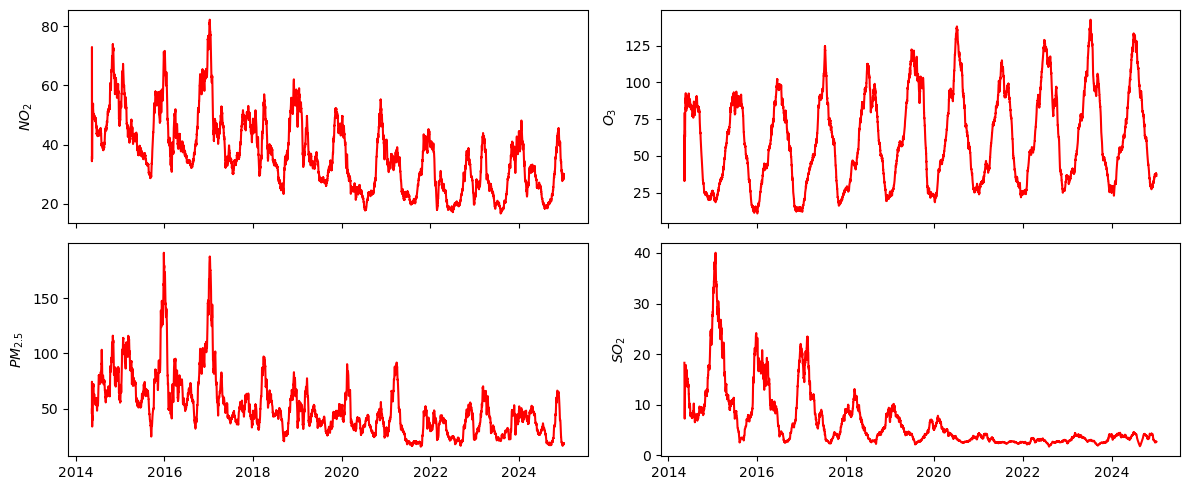

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

trend_1003a_NO2 = 'down'
trend_1003a_SO2 = 'down'
trend_1003a_PM25 = 'down'
trend_1003a_O3 = 'up'

# YOUR CODE HERE
df = pd.read_csv('cncem_data.csv')
df.set_index('time', drop=True, inplace=True)
df.index = pd.to_datetime(df.index)

df_beijing_1003a = df[['Beijing_1003A_NO2', 'Beijing_1003A_O3', 'Beijing_1003A_PM2.5', 'Beijing_1003A_SO2']].copy()

window_size = 720 # adjust here

df_beijing_1003a['NO2_rolled'] = df_beijing_1003a['Beijing_1003A_NO2'].rolling(window=window_size, min_periods=1).mean()
df_beijing_1003a['O3_rolled'] = df_beijing_1003a['Beijing_1003A_O3'].rolling(window=window_size, min_periods=1).mean()
df_beijing_1003a['PM2.5_rolled'] = df_beijing_1003a['Beijing_1003A_PM2.5'].rolling(window=window_size, min_periods=1).mean()
df_beijing_1003a['SO2_rolled'] = df_beijing_1003a['Beijing_1003A_SO2'].rolling(window=window_size, min_periods=1).mean()

df_beijing_1003a

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharex=True)
axes[0, 0].plot(df_beijing_1003a.index, df_beijing_1003a['NO2_rolled'], color='red', linewidth=1.5, label='$NO_2$')
axes[0, 0].set_ylabel('$NO_2$')

axes[0, 1].plot(df_beijing_1003a.index, df_beijing_1003a['O3_rolled'], color='red', linewidth=1.5, label=f'$O_3$')
axes[0, 1].set_ylabel('$O_3$')

axes[1, 0].plot(df_beijing_1003a.index, df_beijing_1003a['PM2.5_rolled'], color='red', linewidth=1.5, label=f'$PM_{2.5}$')
axes[1, 0].set_ylabel('$PM_{2.5}$')

axes[1, 1].plot(df_beijing_1003a.index, df_beijing_1003a['SO2_rolled'], color='red', linewidth=1.5, label=f'$SO_2$')
axes[1, 1].set_ylabel('$SO_2$')

plt.tight_layout()


### 1.b (5 points) average across cities and obtain seasonal averages

We will now try to infer the typical seasonal patterns of the different pollutants. For that, we first average the data across the five cities.

1. Using `df.columns.str.startswith('CITYNAME_')` and `df_filtered.columns.str.endswith('_POLLUTANT')` we can set cuts on the columns, to create new `pd.DataFrame` objects for each city and pollutant including all measurement sites for that city.
2. Run a *median* over each city and pollutant and then combine the cities again for each pollutant, i.e. obtain **df_no2**, **df_so2**, **df_o3**, and **df_pm25** including columns for each of the five city *station*-median time series. Looping could make all this much simpler, but you can also hard-code it.
3. Expore the autocorrelation function for each pollutant up to a lag of 365 days (use 24, 24$\cdot$7 and 24$\cdot$365 to explore daily, weekly and yearly patterns) for several cities. Plot one of them for grading and keep in mind, that you might need to interpolate (`pd.DataFrame.interpolate`) the time series to get a result. What periodic patterns do you discover? Write your answer into a string called **periodic_patterns_string**.
4. Make a plot of the seasonal cycle of the PM$_{2.5}$ and O$_3$ values for each city using `pd.groupby`. Do they all have the same seasonal trend for the same pollutant, which city has the strongest seasonality and what is different between O$_3$ and PM$_{2.5}$

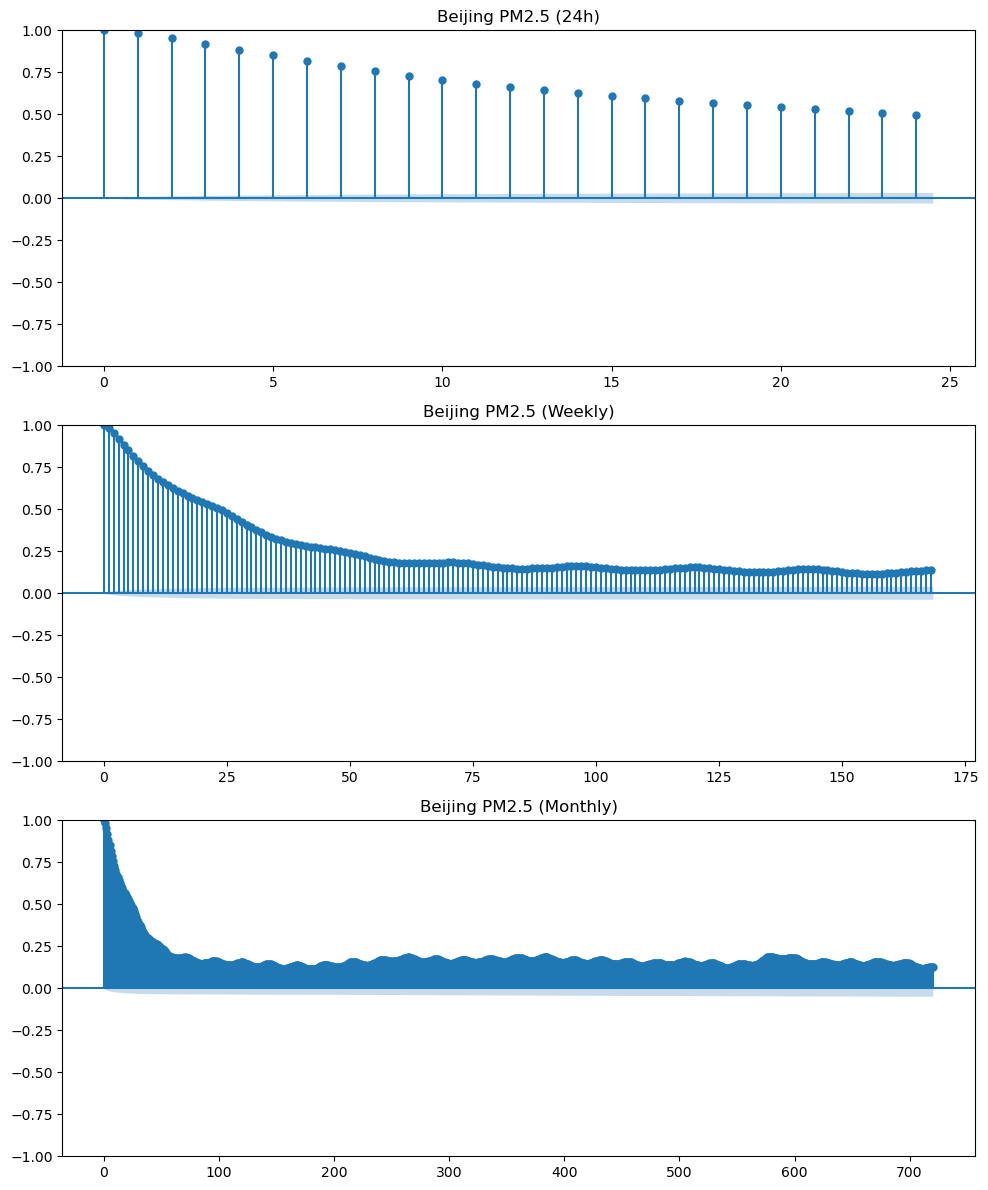

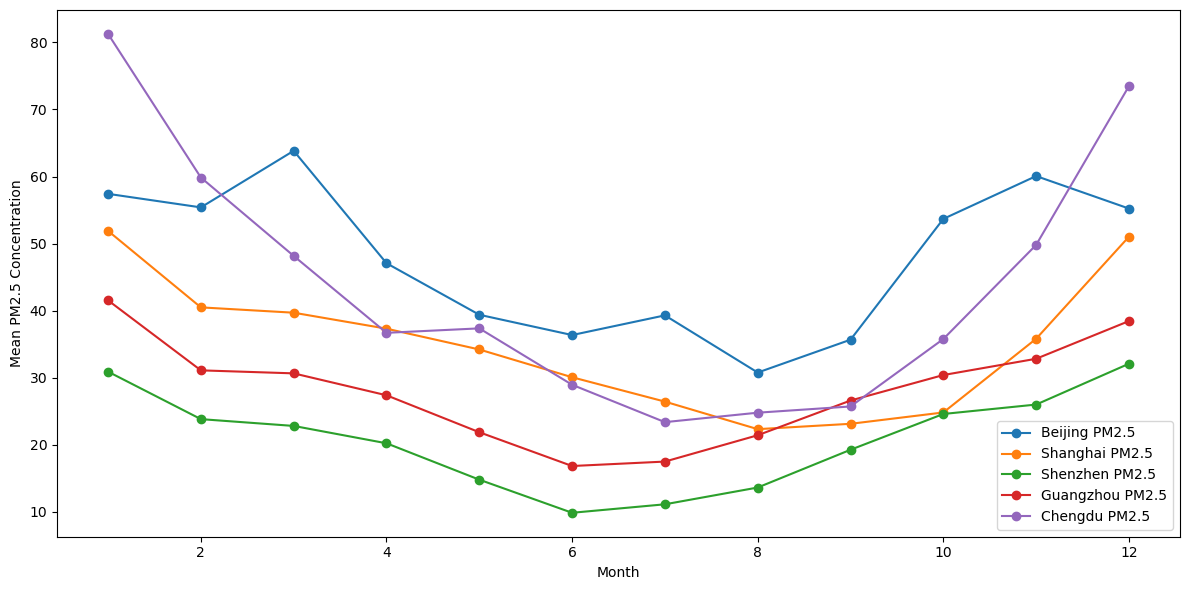

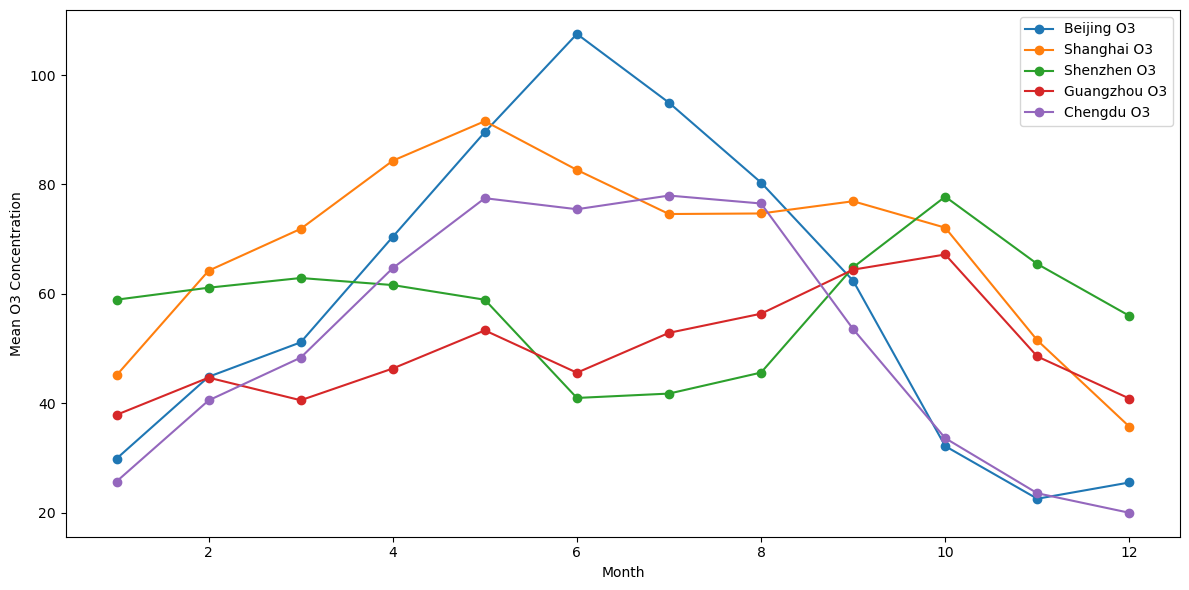

In [10]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

periodic_patterns_string = 'there is a strong lag on the daily acf, a bit less on the weekly acf, and a periodicity in the monthly acf'

# YOUR CODE HERE
# Starting a list of all cities, and a dict for all pollutants
cities = ['Beijing', 'Shanghai', 'Shenzhen', 'Guangzhou', 'Chengdu']
pollutants_map = {
    'NO2': '_NO2',
    'SO2': '_SO2',
    'O3': '_O3',
    'PM2.5': '_PM2.5'
}

# Initialize all dataframes for the pollutants
df_no2 = pd.DataFrame(index=df.index)
df_so2 = pd.DataFrame(index=df.index)
df_o3 = pd.DataFrame(index=df.index)
df_pm25 = pd.DataFrame(index=df.index)

pollutant_dfs = {
    'NO2': df_no2,
    'SO2': df_so2,
    'O3': df_o3,
    'PM2.5': df_pm25
}

for pollutant_name, pollutant_suffix in pollutants_map.items():
    current_pollutant_master_df = pollutant_dfs[pollutant_name]
    for city in cities:
        city_pollutant_cols = [
            col for col in df.columns
            if col.startswith(f'{city}_') and col.endswith(pollutant_suffix)
        ]

        if city_pollutant_cols:
            current_pollutant_master_df[city] = df[city_pollutant_cols].median(axis=1)

    
#interpolating to get rid of NaNs
pm25_beijing_interpolated = df_pm25['Beijing'].interpolate(method='linear')

fig_acf, axes_acf = plt.subplots(3, 1, figsize=(10, 12))
plot_acf(pm25_beijing_interpolated.dropna(), lags=24, ax=axes_acf[0], title='Beijing PM2.5 (24h)')
plot_acf(pm25_beijing_interpolated.dropna(), lags=24*7, ax=axes_acf[1], title='Beijing PM2.5 (Weekly)')
plot_acf(pm25_beijing_interpolated.dropna(), lags=24*30, ax=axes_acf[2], title='Beijing PM2.5 (Monthly)')
plt.tight_layout()



plt.figure(figsize=(12, 6))
for city in cities:
    monthly_pm25 = df_pm25[city].groupby(df_pm25.index.month).mean()
    plt.plot(monthly_pm25.index, monthly_pm25.values, label=f'{city} PM2.5', marker='o')
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 Concentration')
plt.legend()
plt.tight_layout()


plt.figure(figsize=(12, 6))
for city in cities:
    monthly_o3 = df_o3[city].groupby(df_o3.index.month).mean()
    plt.plot(monthly_o3.index, monthly_o3.values, label=f'{city} O3', marker='o')
plt.xlabel('Month')
plt.ylabel('Mean O3 Concentration')
plt.legend()
plt.tight_layout()


### 1.c (5 points) seasonal and trend decomposition

We will now use `statsmodels.tsa.seasonal.STL` for a seasonal and trend decomposition of the data. 

1. We need to work with at least daily averages for applaying `statsmodels.tsa.seasonal.STL`. Therefore reduce the above obtained `df_pm25` and `df_o3` (or reload them from the files `./cncem_o3_city_averages.csv` and `cncem_pm2.5_city_averages.csv`, but keep in mind that you need to set the `pd.DatetimeIndex` again) using `pd.DataFrame.resample()`.
2. Obtain the seasonal (annual seasonality) and trend decomposition from `statsmodels.tsa.seasonal.STL` for O$_3$ in Chengdu and PM$_{2.5}$ in Beijing and plot them using the built-in `statsmodels.tsa.seasonal.DecomposeResult.plot()` method.

/tmp/ipykernel_966/21606201.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chengdu_o3_daily = df_o3_daily['Chengdu'].fillna(method='ffill').fillna(method='bfill')


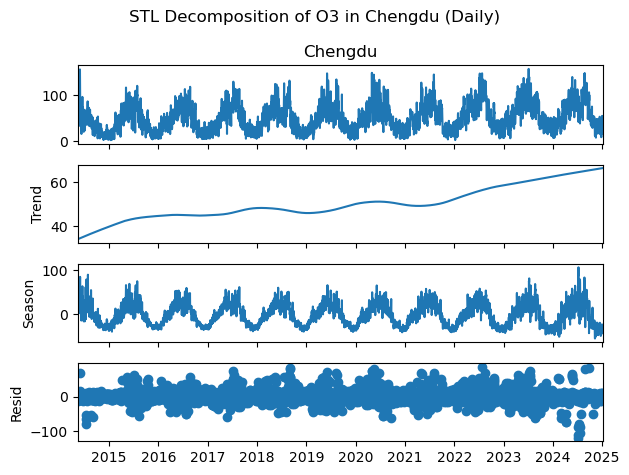

/tmp/ipykernel_966/21606201.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beijing_pm25_daily = df_pm25_daily['Beijing'].fillna(method='ffill').fillna(method='bfill')


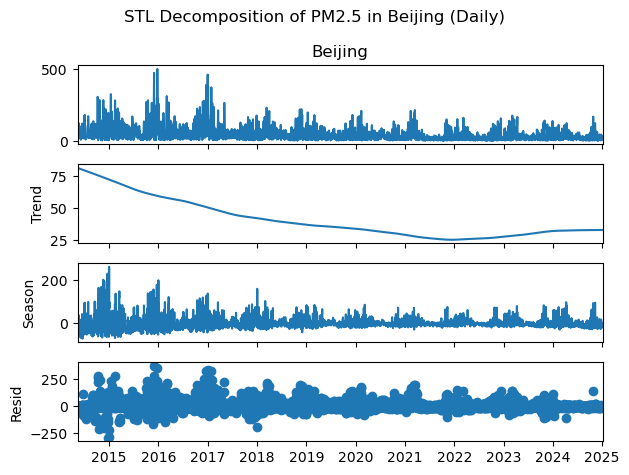

In [11]:
import pandas as pd
from statsmodels.tsa.seasonal import STL

# YOUR CODE HERE
# PM2.5 Data read, datetime, resample
df_pm25_city_avg = pd.read_csv('cncem_pm2.5_city_averages.csv')
# setting datetime as index
df_pm25_city_avg['time'] = pd.to_datetime(df_pm25_city_avg['time'])
df_pm25_city_avg.set_index('time', inplace=True)
# resampling for daily means
df_pm25_daily = df_pm25_city_avg.resample('D').mean()

# O3 Data read, datetime, resample
df_o3_city_avg = pd.read_csv('cncem_o3_city_averages.csv')
df_o3_city_avg['time'] = pd.to_datetime(df_o3_city_avg['time'])
df_o3_city_avg.set_index('time', inplace=True)
df_o3_daily = df_o3_city_avg.resample('D').mean()


#df_pm25_daily
#df_o3_daily

# O3 data
# handlind NaNs
chengdu_o3_daily = df_o3_daily['Chengdu'].fillna(method='ffill').fillna(method='bfill')

# STL
stl_o3_chengdu = STL(chengdu_o3_daily, period=365, robust=True)
res_o3_chengdu = stl_o3_chengdu.fit()

#plotting
fig_o3_chengdu = res_o3_chengdu.plot()
fig_o3_chengdu.suptitle('STL Decomposition of O3 in Chengdu (Daily)') # Adjust title position
plt.tight_layout()
plt.show()

# pm2.5 data
# handlind NaNs
beijing_pm25_daily = df_pm25_daily['Beijing'].fillna(method='ffill').fillna(method='bfill')

# STL
stl_pm25_beijing = STL(beijing_pm25_daily, period=365, robust=True)
res_pm25_beijing = stl_pm25_beijing.fit()

# plotting
fig_pm25_beijing = res_pm25_beijing.plot()
fig_pm25_beijing.suptitle('STL Decomposition of PM2.5 in Beijing (Daily)')
plt.tight_layout()
plt.show()

### 1.d (5 points) Forecasting using SARIMA

Now we are using SARIMA, to try to make a short-term prediction how PM$_{2.5}$ will evolve in the near future. We again use the daily mean values obtained above. 

1. We now make an average across all cities and we resample to have monthly means.
2. Built a seasonal ARIMA (SARIMA) model with `seasonal_order=(P, D, Q, 12)` and `order=(p, d, q)`. Play around a bit with different combinations of `p,d,q,P,D,Q` between 1 and 2. Plot the SARIMA output. Do you support the hypothesis of the paper "A decade of China's air quality monitoring data suggests ghealth impacts are no longer declining", please write your thoughts into the string called **sarima_hypothesis_discussion**?

/tmp/ipykernel_966/4176793883.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_series.fillna(method='ffill', inplace=True)
/tmp/ipykernel_966/4176793883.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_series.fillna(method='bfill', inplace=True)


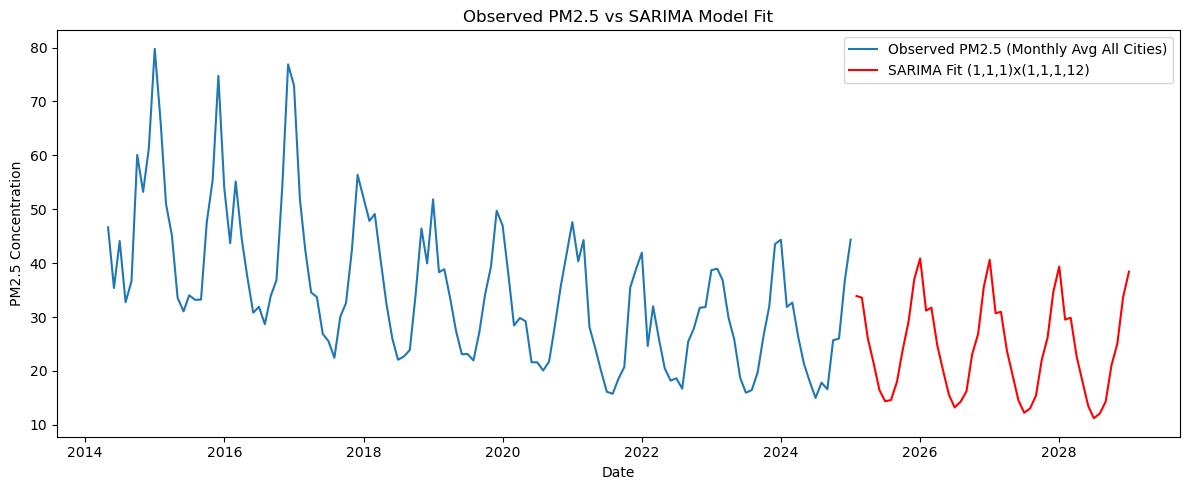

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_hypothesis_discussion = 'while there is still a decrease, the decrease is much smaller than in the beginning'

# YOUR CODE HERE
# O3
# calc mean across cities (still per day from 1c)
df_o3_daily_mean_all_cities = df_o3_daily.mean(axis=1)
# resample for monthly means
df_o3_monthly_avg_all_cities = df_o3_daily_mean_all_cities.resample('MS').mean()
# df_o3_monthly_avg_all_cities

# PM2.5, same same
df_pm25_daily_mean_all_cities = df_pm25_daily.mean(axis=1)
df_pm25_monthly_avg_all_cities = df_pm25_daily_mean_all_cities.resample('MS').mean()
# df_pm25_monthly_avg_all_cities


# Arima model
data_series = df_pm25_monthly_avg_all_cities.copy()
data_series.fillna(method='ffill', inplace=True)
data_series.fillna(method='bfill', inplace=True)
data_series.dropna(inplace=True)

# SARIMA parameters
p, d, q = 1, 1, 1  # Non-seasonal components
P, D, Q, s = 1, 1, 1, 12 # Seasonal components

# define model, ensure data_series is not empty and has enough points
model = SARIMAX(data_series,
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

forecast = results.get_forecast(steps=48)
forecast_series = forecast.predicted_mean

# Plot
plt.figure(figsize=(12, 5))
plt.plot(data_series.index, data_series, label='Observed PM2.5 (Monthly Avg All Cities)')
plt.plot(forecast_series.index, forecast_series, label=f'SARIMA Fit ({p},{d},{q})x({P},{D},{Q},{s})', color='red')
plt.title('Observed PM2.5 vs SARIMA Model Fit')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.tight_layout()